<a href="https://www.kaggle.com/code/sai10py/ai-developer-productivity-prediction?scriptVersionId=243938389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1 | Description and Goal
## 1.1 | Dataset Description
The AI Developer Productivity (Synthetic ) Dataset contains data about developer work behaviours using AI. Contains behavioral patterns and productivity indicators for developer work style analysis.

## 1.2 | Goal
To make predictive model that can predict task success

## 2.3 | Tasks
- Dataset Overview
- Analysing Data
- Building Model

# 2 | Importing Initial Dependencies

In [1]:
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computing
import matplotlib.pyplot as plt # static visualizations
import seaborn as sns # statistical graphics

In [2]:
# load dataset
df = pd.read_csv("/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv")

In [3]:
# First 5 Rows
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
# Dataset statistics for Numerical columns
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


# 3 | Understanding Columns

`hours_coding`

Total focused hours spent on doing the software development task. Max - 12 hours and Min - 0 hours (from dataset).

`coffee_intake_mg`

Daily caffeine intake in units of milligrams. Caffeine intake can affect work performance depending on quantity.

`distractions`

Number of distractions that developer face while working. More distractions may lead to decreased productivity.

`sleep_hours`

Number of hours slept the previous night. Improper sleep or sleep schedules could hamper productivity.

`commits`

Number of code commits pushed during the day. This could be measure of developer - task efficieny.

`bugs_reported`

Number of bugs reported in code written that day.

`ai_usage_hours`
Number of hours spent using AI tools. Our area of focus for this task. Using AI can boost productivity and enhance multitasking. Also distractions could be less effective.

`cognitive_load` 

Self-reported mental strain on a scale of 1 to 10.

`task_success`

Target column - whether the daily productivity goal was achieved or not. 1 for success and 0 for failure.


# 4 | Data Analysis

Analysing columns and their relations with the `task_success` column

## 4.1 | Heatmap correlation

<Axes: >

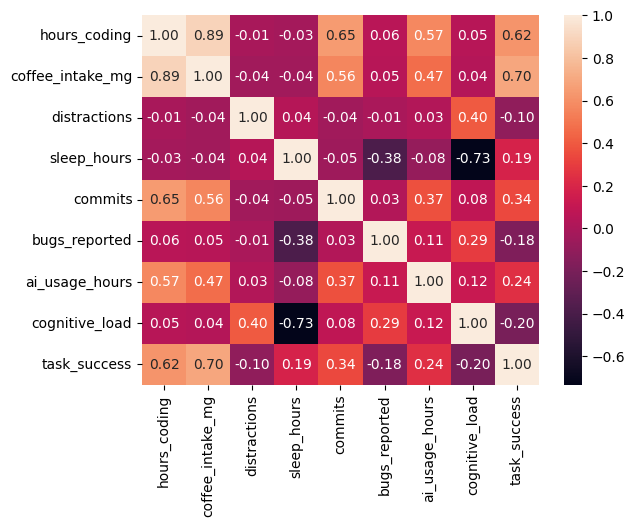

In [6]:
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

## 4.2 | Key Observations and Inferences

### Observations
- `hours_coding` and `coffee_intake_mg` show high relevance with `task_success` column.
- `commits` and `ai_usage_hours` show mediocre relevance with target column.
- `distractions`, `bugs_reported` and `cognitive_load` show inverse relation with `task_success` column.
- `bugs_reported` and `cognitive_load` affect `sleep_hours` in negative manner.
- `hours_coding` and `coffee_intake_mg` are highly related to producivity columns like `ai_usage_hours` and `commits`.

### Inferences
- `hours_coding` and `coffee_intake_mg`  are major factors for task success. When number of hours given to task increase the chances of task success also increase.
- `commits` and `ai_usage_hours` could be supportive features for task success.
- `distractions`, `bugs_reported` and `cognitive_load` affect mental state and concentration which would directly affect task success.
- Increase in reported bugs and cognitive load could heavily affect the sleep hours which would then increase fatigue.

## 4.3 |  `cognitive_load` vs `sleep_hours` w.r.t `task_success`

<Axes: xlabel='sleep_hours', ylabel='cognitive_load'>

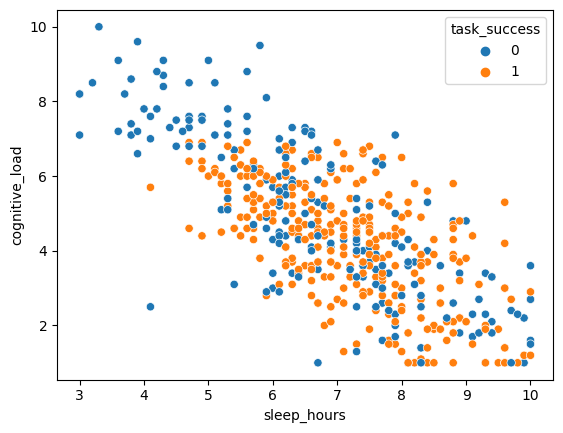

In [7]:
# Cognitive load and Sleep hours
sns.scatterplot(x = "sleep_hours", y = "cognitive_load", data = df, hue = "task_success")

- Combination of less sleep hours and increased cognitive load leads to task failure. 
- A proper sleep and subtle cognitive load can be highly productive.
- Sometimes low cognitive load might decrease the motivation to work and thus lead to task not getting complete.

## 4.4  | Analysing Feature Distributions

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


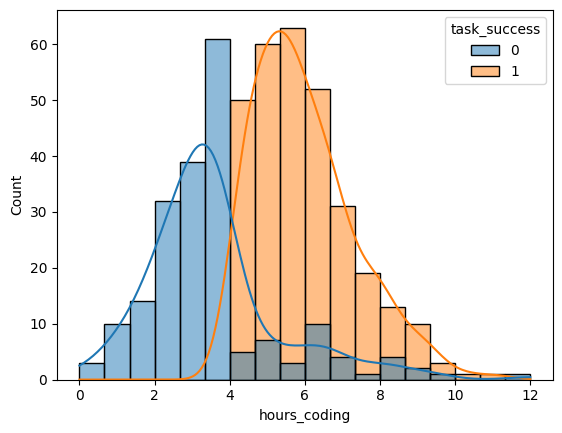

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

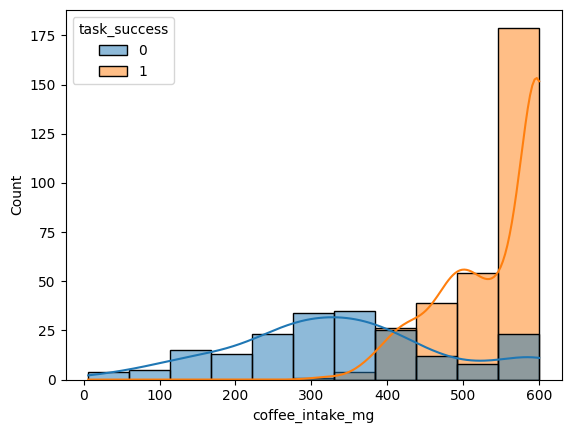

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

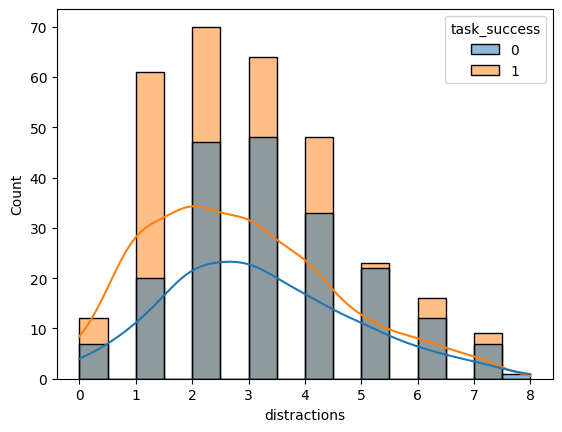

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


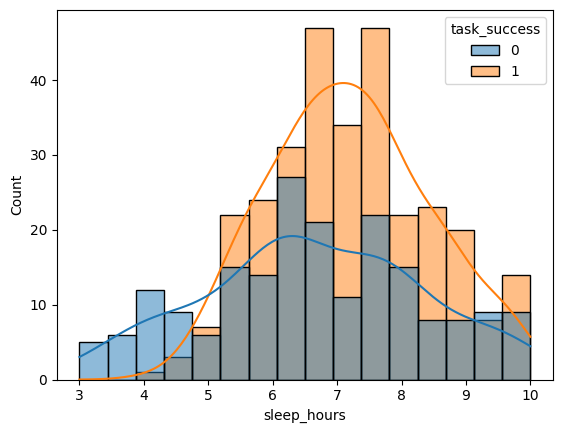

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

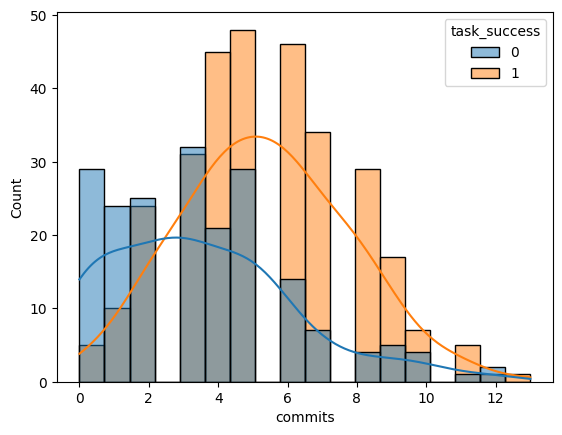

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

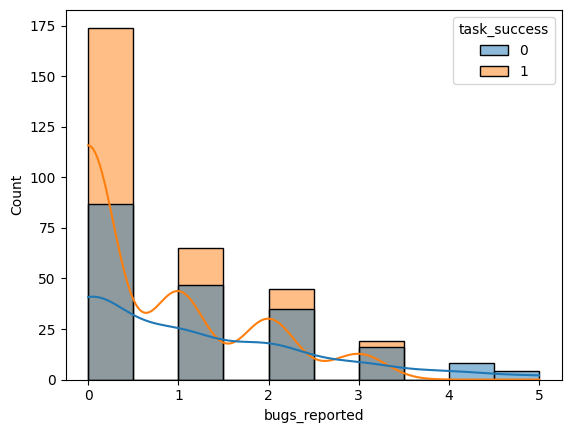

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


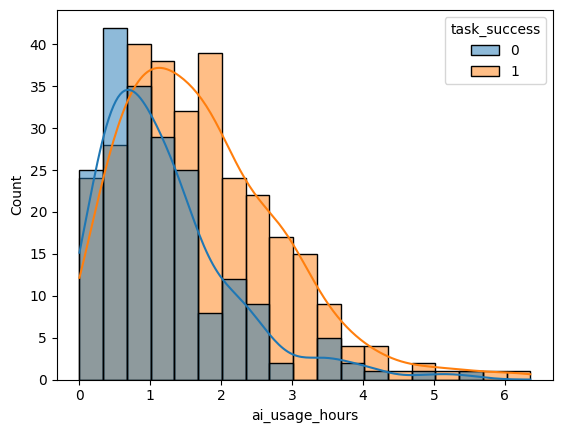

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


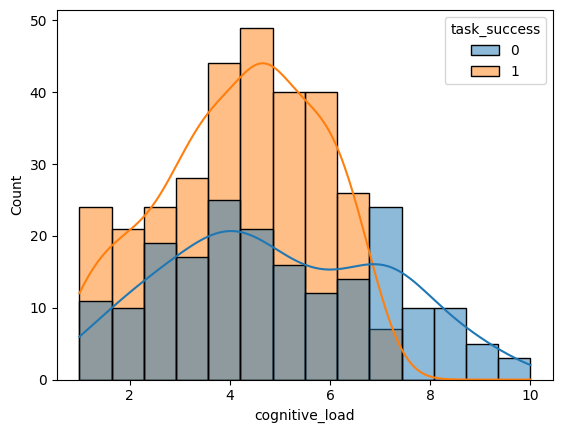

In [8]:
for col in df.columns:
    if col != "task_success":
        plt.show(sns.histplot(x = col, data = df, kde = True, hue = "task_success"))

Above graphs are highly useful for analysing distribution and finding patterns.

# 5 | Model Training

## 5.1 | Splitting into X and y

In [9]:
X = df.drop(columns = "task_success")
y = df["task_success"]

## 5.2 | Splitting into Train and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 5.3  | Baseline Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 5.4 | Model Evaluation

**********  Accuracy Score  **********
Train Accuracy:  0.8725
Test Accuracy:  0.83
**********  Confusion Matrix  **********
Train Confusion Matrix: 


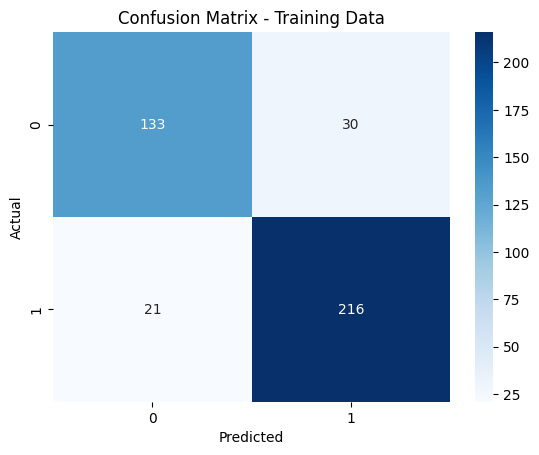

Test Confusion Matrix: 


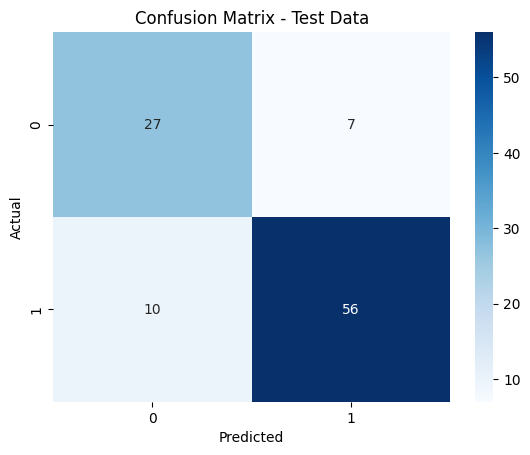

**********  Classification Report  **********
Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       163
           1       0.88      0.91      0.89       237

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.87      0.87      0.87       400

Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        34
           1       0.89      0.85      0.87        66

    accuracy                           0.83       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.83      0.83      0.83       100



In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("*"*10, " Accuracy Score ", "*"*10)
print("Train Accuracy: ", accuracy_score(train_preds, y_train))
print("Test Accuracy: ", accuracy_score(test_preds, y_test))

print("*"*10, " Confusion Matrix ", "*"*10)
print("Train Confusion Matrix: ")
conf_matrix_train = confusion_matrix(y_train, train_preds)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Training Data")
plt.show()
print("Test Confusion Matrix: ")
conf_matrix_test = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Data")
plt.show()

print("*"*10, " Classification Report ", "*"*10)
print("Train Classification Report:")
class_report = classification_report(y_train, train_preds)
print(class_report)
print("Test Classification Report:")
class_report = classification_report(y_test, test_preds)
print(class_report)

# Further Steps
- Data Augmentation can be done to get more idea about the behavioral patterns.
- Deeper analysis could fetch significant information and productivity improvement tips
- Better classification model could highly increase the accuracy